In [10]:
from GlassBox.ebm.ebm_utils import EBMGridSearch
from interpret.glassbox import ExplainableBoostingRegressor
import matplotlib.pyplot as  plt
import pandas as pd
%reload_ext autoreload
%autoreload 2

In [2]:
EBM_parameter = dict(
    learning_rate= [0.01, 0.02, 0.03],
    min_samples_leaf=[2, 3, 4, 5, 6, 7, 8, 9, 10],
    max_leaves=[2, 3, 4, 5, 6, 7],
)

# Grid-search

In [3]:
gs = EBMGridSearch(
    path_dataset="../../outputs/scores.csv",
    task="Regressor",
    random_state=841)

In [4]:
best_ = gs.grid_search(
    EBMModel=ExplainableBoostingRegressor,
    hyperparameters=EBM_parameter)
gs.save_model(best_[0], name="ebmreg_unbalanced")

100%|██████████| 162/162 [00:42<00:00,  3.80it/s, nDCG_15_at=0.833]


# Metric evaluation

In [5]:
best_model = gs.load_model(name="ebmreg_unbalanced")

In [6]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1,10,15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1,10,15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1,10,15])

display(pd.DataFrame([nDCG_train,nDCG_valid,nDCG_test],index=["Training","Validation","Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.8658,0.7956,0.8038
Validation,0.7892,0.8069,0.8325
Test,0.8217,0.7878,0.8116


# Grid search - balanced

In [7]:
gs = EBMGridSearch(
    path_dataset="../../outputs/balanced_scores.csv",
    task="Regressor",
    random_state=841)

In [8]:
best_ = gs.grid_search(
    EBMModel=ExplainableBoostingRegressor,
    hyperparameters=EBM_parameter)
gs.save_model(best_[0], name="ebmreg_balanced")

100%|██████████| 162/162 [00:28<00:00,  5.69it/s, nDCG_15_at=0.937]


In [9]:
best_model = gs.load_model(name="ebmreg_balanced")

In [10]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1, 10, 15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1, 10, 15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1, 10, 15])

display(pd.DataFrame([nDCG_train, nDCG_valid, nDCG_test], index=["Training", "Validation", "Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.8967,0.8726,0.9071
Validation,0.8650,0.9264,0.9366
Test,0.8258,0.8840,0.9234


# Explanation

In [4]:
best_model = gs.load_model(name="ebmreg_unbalanced")

In [5]:
best_model

ExplainableBoostingRegressor(feature_names=['Education', 'City', 'Skills',
                                            'SoftSkills', 'Age', 'Language',
                                            'Certificates', 'Experience',
                                            'Salary', 'SmartWork',
                                            'Experience_abroad'],
                             interactions=0, learning_rate=0.03, max_leaves=2,
                             min_samples_leaf=3, n_jobs=-1)

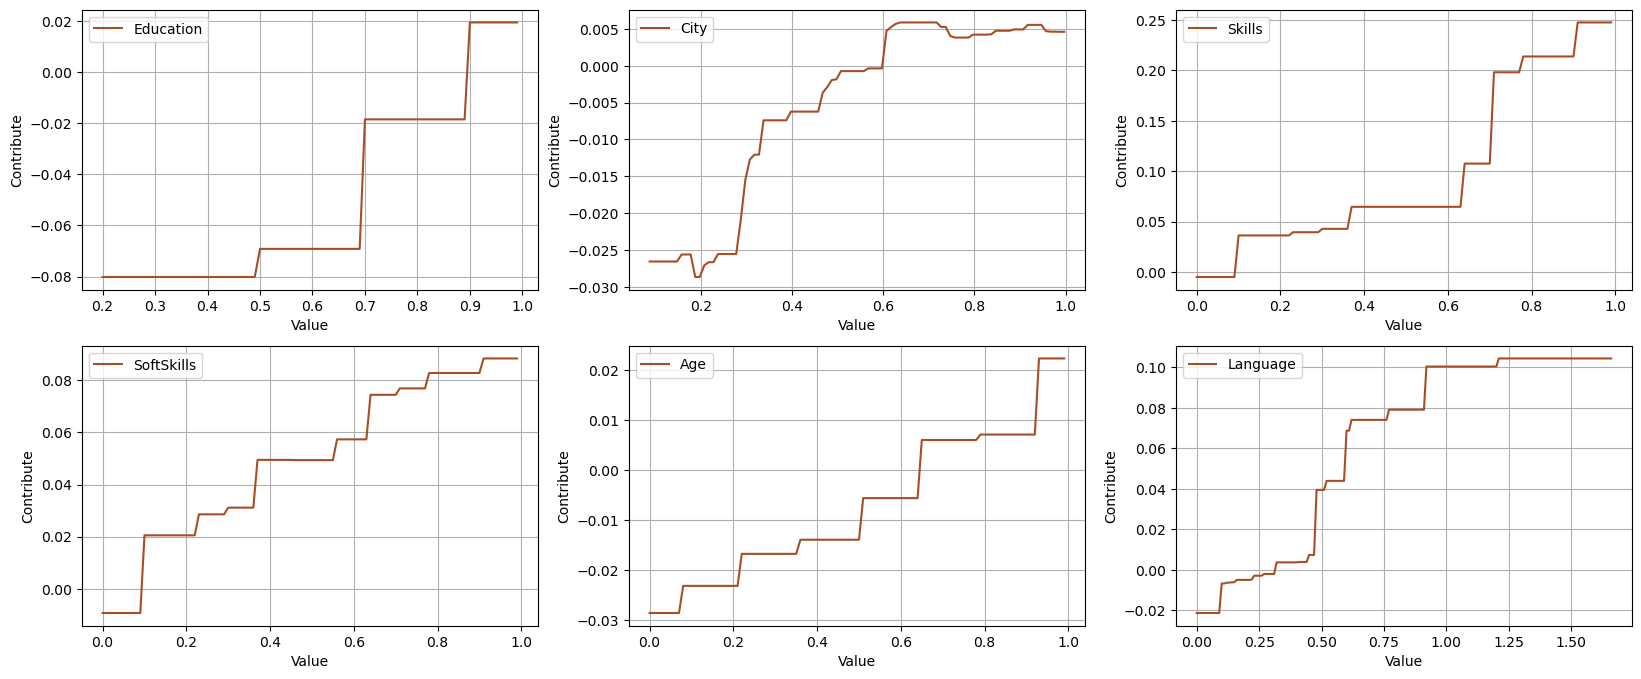

In [15]:
f, axs = plt.subplots(ncols=3,nrows=2,figsize=(20,8))

for i, feature in enumerate(best_model.feature_names[:6]):

    x,y = gs.explanation(best_model, i)
    axs[int(i/3)][i%3].set_xlabel("Value")
    axs[int(i/3)][i%3].set_ylabel("Contribute")
    axs[int(i/3)][i%3].grid()
    axs[int(i/3)][i%3].plot(x,y, label=feature, color="#a74e25")
    axs[int(i/3)][i%3].legend()
plt.show()

## Example of Job-offer

In [15]:
# qId = 1
# job_curricula = gs.test[gs.test["qId"] == qId]
# 
# y_pred = best_model.predict(np.asarray(job_curricula.iloc[:, 2:13]))
# 
# y_pred = pd.DataFrame(y_pred, index=job_curricula.index, columns=["lambdas"])
# dt_final = pd.merge(job_curricula, y_pred, left_index=True, right_index=True)
# dt_final.sort_values("labels", ascending=False)["labels"].head(15)
# dt_final.sort_values("lambdas",ascending=False)["labels"].head(15)